# 주성분 분석

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/6-3.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## PCA 클래스

In [3]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2023-03-10 05:36:08--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-03-10 05:36:08--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-03-10 05:36:08--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... conne

In [4]:
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [5]:
from sklearn.decomposition import PCA # 주성분 분석 알고리즘

pca = PCA(n_components=50) # 주성분의 개수 지정
pca.fit(fruits_2d)

PCA(n_components=50)

In [6]:
print(pca.components_.shape) # 50개의 주성분과, 특성개수

(50, 10000)


In [7]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다. 
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

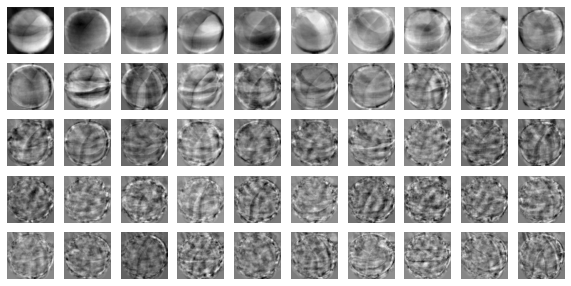

In [8]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [9]:
print(fruits_2d.shape)

(300, 10000)


In [10]:
fruits_pca = pca.transform(fruits_2d) # 50개의 주성분을 찾은  PCA 모델을 이용해 배열 변환

In [11]:
print(fruits_pca.shape) # 50개의 특성을 가진 데이터(10000개 특성을 1/200으로 줄임), 어느정도 손실 감수 해야댐

(300, 50)


## 원본 데이터 재구성

In [12]:
fruits_inverse = pca.inverse_transform(fruits_pca) # 복원 메서드
print(fruits_inverse.shape)

(300, 10000)


In [13]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

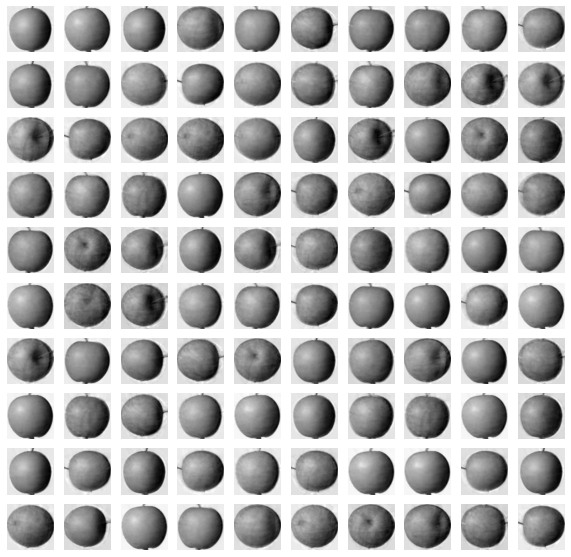

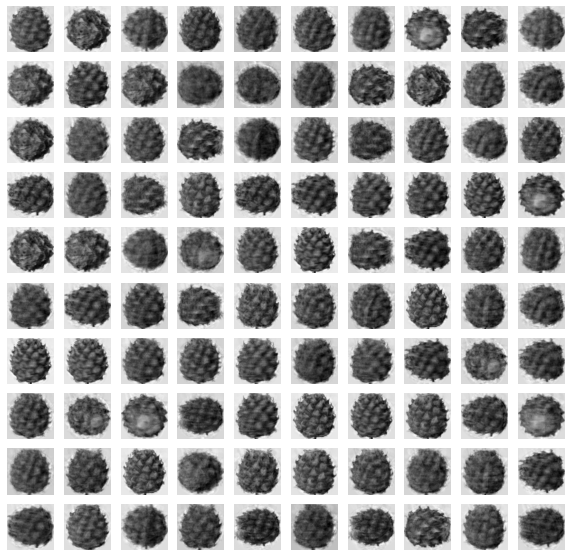

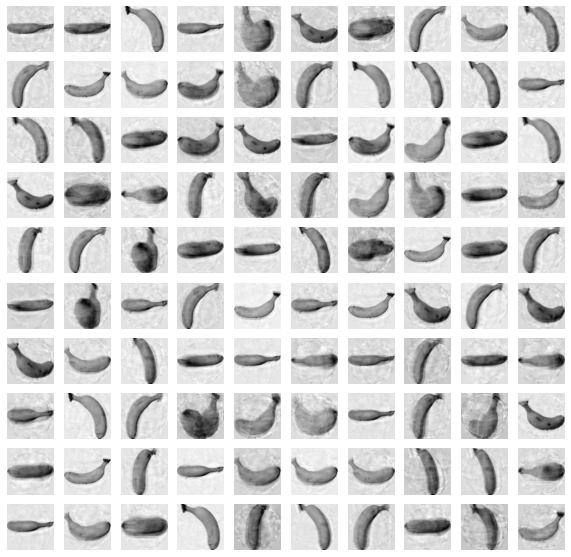

In [14]:
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100]) # 위에 만든 draw_fruits()함수
    print("\n") # 0~100, 100~200, 200~300 

## 설명된 분산

In [15]:
print(np.sum(pca.explained_variance_ratio_)) # 분산

0.921553986355852


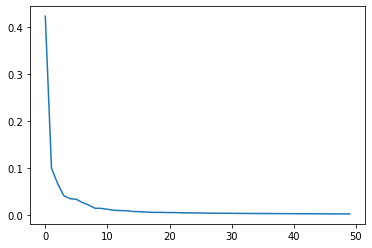

In [16]:
plt.plot(pca.explained_variance_ratio_) # 주성분을 굳이 50까지 설정할 이유가 없었음. 10개의 주성분이 대부분의 분산을 표현함

## 다른 알고리즘과 함께 사용하기

In [17]:
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀 모델

lr = LogisticRegression() 

In [18]:
target = np.array([0] * 100 + [1] * 100 + [2] * 100) # 0,1,2 각각 100개씩 타깃에 저장

In [19]:
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target) # 교차검증 
print(np.mean(scores['test_score'])) # 검증 평가 값
print(np.mean(scores['fit_time'])) # 소요시간

0.9966666666666667
2.6632046699523926


In [20]:
scores = cross_validate(lr, fruits_pca, target) # pca 즉 주성분50개로 설정한 데이터
print(np.mean(scores['test_score'])) 
print(np.mean(scores['fit_time'])) # 훨씬 빨라짐

1.0
0.04802117347717285


In [29]:
pca = PCA(n_components=0.5) 
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [31]:
print(pca.n_components_) # 주성분 2개

2


In [32]:
fruits_pca = pca.transform(fruits_2d) # 원본 데이터를 변환
print(fruits_pca.shape)

(300, 2)


In [33]:
scores = cross_validate(lr, fruits_pca, target) # 주성분 2개로 설정한 데이터
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.03438444137573242


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [34]:
# 축소된 데이터를 사용해  k-평균 알고리즘으로 클러스터 찾기
from sklearn.cluster import KMeans 

km = KMeans(n_clusters=3, random_state=42) # 클러스터 3개
km.fit(fruits_pca) 

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [35]:
print(np.unique(km.labels_, return_counts=True)) # 클러스터는 각각 100,99,91개 샘플을 가지고 있음

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


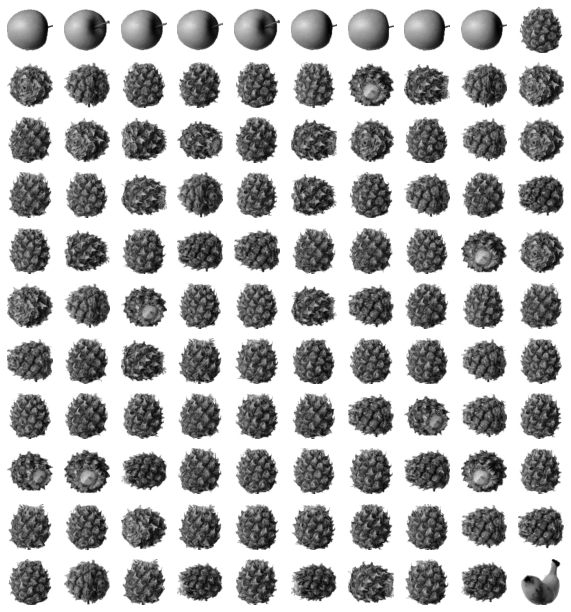

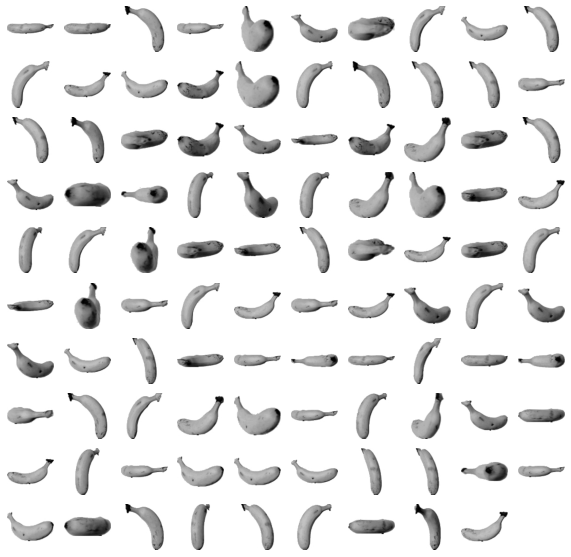

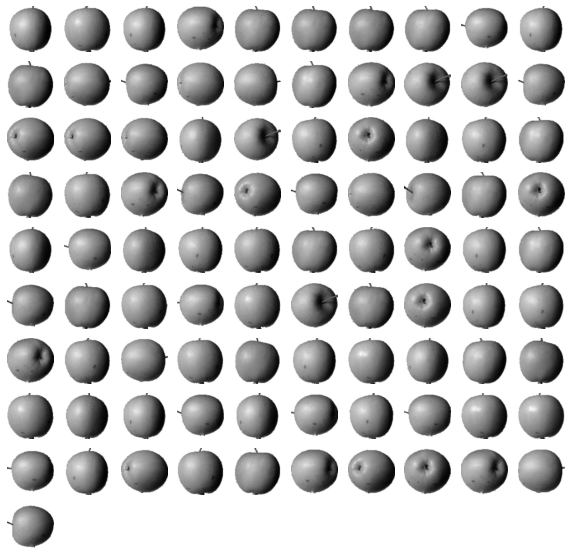

In [36]:
for label in range(0, 3): 
    draw_fruits(fruits[km.labels_ == label]) 
    print("\n")

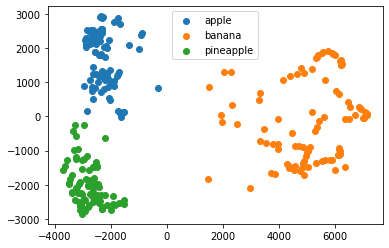

In [37]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()
# 훈련 데이터의 차원을 줄이면 시각화가 비교적 쉬워진다, 10000개 특성을 2개 주성분으로 줄여 2차원 표현이 가능해짐 

* 차원 축소: 원본 데이터의 특성을 적은 수의 새로운 특성으로 변환하는 비지도 학습의 한 종류, 저장공간을 줄이고 시각화 하기 쉬움

* 주성분 분석: 차원 축소 알고리즘의 하나로 데이터에서 가장 분산이 큰 방향을 찾는 방법, 원본데이터를 주성분에 넣어 특성을 만듬, 일반적으로 원본데이터 보다 적은 개수

* 설명된 분산: 주성분 분석에서 주성분이 얼마나 원본 데이터의 분산을 잘 나타내는지 기록한 것, pca 클래스는 주성분 갯수와 설명된 분산의 비율을 지정하여 주성분 분석 수행

* scikit-learn
  - PCA는 주성분 분석으르 수행하는 클래스
    * n_components는 주성분 개수 지정
    * components_속성에는 훈련 세트에서 찾은 주성분이 저장
    * explainded_variance_속성에는 설명된 분산이 저장, ratio_에는 비율 저장
    * inverse_transform() 메서드는 축소시킨 데이터를 다시 원본 데이터로 복원